# EE379K Lab 5
## Irfan Hasan (ih3976), Peter Zhang (yz7724)

In [14]:
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

%matplotlib inline

# Question 1

## Part 1

/Users/irfanhasan/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


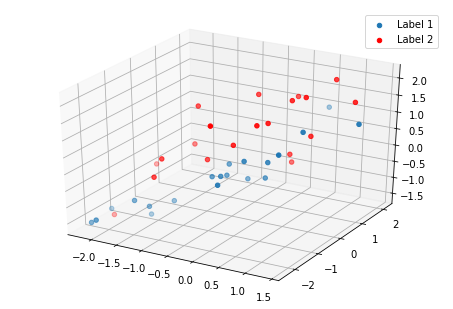

In [18]:
cov1 = [[1, 0.9, 0.9],
        [0.9, 1, 0.9],
        [0.9, 0.9, 1]]
cov2 = [[1, 0.8, 0.8],
        [0.8, 1, 0.8],
        [0.8, 0.8, 1]]
label1 = np.random.multivariate_normal([0, 0, 0], cov1, 20)
label2 = np.random.multivariate_normal([0, 0, 1], cov2, 20)
samples = [label1, label2]


# Plot
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(label1.T[0], label1.T[1], label1.T[2], label='Label 1')
ax.scatter(label2.T[0], label2.T[1], label2.T[2], c='r', label='Label 2')
ax.legend()
fig.show()

## Part 2

within-class Scatter Matrix:
 [[ 36.88543667  31.840454    26.74110955]
 [ 31.840454    38.38901812  26.79287543]
 [ 26.74110955  26.79287543  29.26676422]]
between-class Scatter Matrix:
 [[  1.56468426   1.47671024   5.07379163]
 [  1.47671024   1.39368254   4.78851883]
 [  5.07379163   4.78851883  16.45275158]]

Eigenvector 1: 
[[ 0.32443515]
 [ 0.28388594]
 [-0.90230295]]
Eigenvalue 1: 1.17e+00

Eigenvector 2: 
[[-0.70561893]
 [ 0.70849986]
 [ 0.01139618]]
Eigenvalue 2: -5.74e-17

Eigenvector 3: 
[[ 0.95880217]
 [-0.06979669]
 [-0.27536669]]
Eigenvalue 3: -1.73e-16
Eigenvalues in decreasing order:

1.16929798558
1.72725592676e-16
5.74371110731e-17
Variance explained:

eigenvalue 1: 100.00%
eigenvalue 2: 0.00%
eigenvalue 3: 0.00%
Matrix W:
 [ 0.32443515  0.28388594 -0.90230295]


/Users/irfanhasan/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


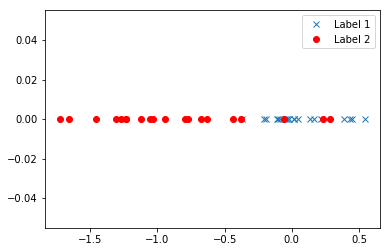

In [40]:
# Compute mean vector
label1_mean = label1.mean(axis=0)
label2_mean = label2.mean(axis=0)

mean_vector = [label1_mean, label2_mean]

# Compute within-class scatter matrix, Sw
n = label1_mean.shape[0] # num of features
Sw = np.zeros((n,n))

for cl,mv in zip(samples, mean_vector):
    class_sc_mat = np.zeros((n,n)) # scatter matrix for every class
    temp = cl - mv
    for row in temp:
        row = row.reshape(n,1) # make column vectors
        class_sc_mat += row.dot((row).T)
    Sw += class_sc_mat                             # sum class scatter matrices
print('within-class Scatter Matrix:\n', Sw)

# Compute between-class scatter matrix, Sb
all_samples = np.vstack(samples)
# Mean feature vector for combined samples between all classes
overall_mean = all_samples.mean(axis=0).reshape((n, 1))


Sb = np.zeros((n,n))

for cl, mean_vec in zip(samples, mean_vector):
    n1 = cl.shape[0]  #Number of samples within each class
    mean_vec = mean_vec.reshape((n,1)) # make column vector
    t = mean_vec - overall_mean
    Sb += n1 * t @ t.T

print('between-class Scatter Matrix:\n', Sb)

#Solve generalized eigenvalue problem for Sw-1Sb
eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(Sw).dot(Sb))

for i in range(len(eig_vals)):
    eigvec_sc = eig_vecs[:,i].reshape(n,1)   
    print('\nEigenvector {}: \n{}'.format(i+1, eigvec_sc.real))
    print('Eigenvalue {:}: {:.2e}'.format(i+1, eig_vals[i].real))


# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs = sorted(eig_pairs, key=lambda k: k[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues

print('Eigenvalues in decreasing order:\n')
for i in eig_pairs:
    print(i[0])
    
    
# "Explained variance"
print('Variance explained:\n')
eigv_sum = sum(eig_vals)
for i,j in enumerate(eig_pairs):
    print('eigenvalue {0:}: {1:.2%}'.format(i+1, (j[0]/eigv_sum).real))

# Choose eigenvector with the highest eigenvalue:
W = eig_pairs[0][1]
print('Matrix W:\n', W.real)

# Project data matrix onto new subspace
label1_lda = label1 @ W
label2_lda = label2 @ W



fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(label1_lda, np.zeros(label1_lda.shape[0]), label='Label 1', marker='x', linestyle='')
ax.plot(label2_lda, np.zeros(label2_lda.shape[0]), c='r', label='Label 2', marker='o', linestyle='')
ax.legend()
fig.show()

## Part 3

Custom LDA implementation subspace vector
 [ 0.32443515  0.28388594 -0.90230295]
sklearn LDA subspace vector
 [-1.56174282 -1.36654993  4.3434417 ]
The two LDAs produced results that were very similiar to each other, with the main difference being different scalings
Both separated the two classes well


/Users/irfanhasan/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


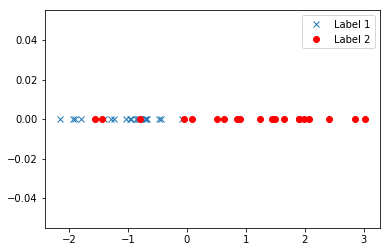

In [47]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# LDA
n1 = label1.shape[0]
n2 = label2.shape[0]

sk_lda = LDA(n_components=1)
y = np.hstack((np.zeros(n1), np.ones(n2)))
lda = sk_lda.fit_transform(all_samples, y)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(lda[:n1], np.zeros(label1_lda.shape[0]), label='Label 1', marker='x', linestyle='')
ax.plot(lda[n1:], np.zeros(label2_lda.shape[0]),  c='r', label='Label 2', marker='o', linestyle='')
ax.legend()
fig.show()

W_skl = sk_lda.coef_


print('Custom LDA implementation subspace vector\n', W.real)

print('sklearn LDA subspace vector\n', W_skl.reshape(-1))

print('The two LDAs produced results that were very similiar to each other, with the main difference being different scalings')
print('Both separated the two classes well')

# Question 2

# Question 3 (Peter)

## Part 1

In [80]:
# set random seed
np.random.seed()

# read Default csv
default = pd.read_csv('default.csv')
default.head()

,default,student,balance,income
0,No,No,729.526495,44361.62507
1,No,Yes,817.180407,12106.13470
2,No,No,1073.549164,31767.13895
3,No,No,529.250605,35704.49394
4,No,No,785.655883,38463.49588


In [75]:
X = default.loc[:, ['balance', 'income']]
Y = default.loc[:, 'default']

## Part 2

In [63]:
# train the model based on 100n% of the data and return error
def calculate_error(X, Y, n):
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=n)
    lr = LogisticRegression()
    lr.fit(x_train, y_train)
    result = lr.predict(x_test)
    correct = np.sum(result == y_test)
    l = len(result)
    percent = (l - correct) / float(l)
    print 'With {0}% training data, the validation set error is {1:0.2f}%'.format(100*n, 100*percent)

## Part 3

In [117]:
calculate_error(X, Y, 0.40)
calculate_error(X, Y, 0.60)
calculate_error(X, Y, 0.80)

With 40.0% training data, the validation set error is 3.33%
With 60.0% training data, the validation set error is 3.33%
With 80.0% training data, the validation set error is 3.38%


I ran the prediction multiple times and oberseved that as the amount of training data increases, the errors generally shows a decreasing trend and most are around 3.30%-3.70%.

## Part 4

In [93]:
default['is_student'] = default['student'] == 'Yes'
new_X = default.loc[:, ['balance','income','is_student']]

In [120]:
calculate_error(new_X, Y, 0.40)
calculate_error(new_X, Y, 0.60)
calculate_error(new_X, Y, 0.80)

With 40.0% training data, the validation set error is 3.08%
With 60.0% training data, the validation set error is 3.35%
With 80.0% training data, the validation set error is 3.21%


I ran the prediction a few times and observed that most of the errors is around the range of 3.00%-3.50%, which is  better than just using 'balance' and 'income'; therefore, including 'student' does help make the prediction better.

# Question 4 (Peter)

## Part 1

In [128]:
np.random.seed()
y = np.random.standard_normal((100,))
x = np.random.standard_normal((100,))
y = x - 2*(x**2) + np.random.standard_normal((100,))

## Part 2

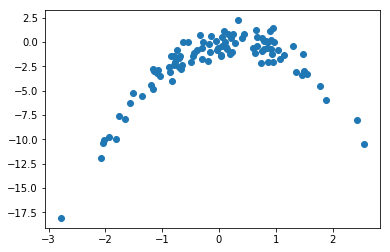

In [130]:
plt.scatter(x, y)
plt.show()

The graph is a upside-down parabola due to squaring the x.

## Part 3